In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smartwatch-for-elderly/MPU6050_Activity_Data_with_Sitting.csv
/kaggle/input/acc-sensor/MPU6050_Activity_Data_with_Sitting_Bending_Final.csv
/kaggle/input/5-activity/5_activity.csv


In [2]:
!pip install scikit-learn==1.5.2 --upgrade --quiet
import sklearn
print(sklearn.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 24.2 MB/s eta 0:00:0000:010:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
1.5.2


In [3]:
Data = pd.read_csv('/kaggle/input/5-activity/5_activity.csv')

print(f'Shape of collection data is: {Data.shape}')

Shape of collection data is: (12498, 7)


In [4]:
Data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Activity
0,0.02,0.01,0.98,-0.06,-0.04,1.03,0
1,-0.01,0.07,1.05,0.00,-0.06,1.03,0
2,0.04,-0.09,1.03,0.05,-0.08,1.08,0
3,-0.03,0.04,1.01,-0.14,0.00,1.03,0
4,0.09,0.02,1.03,0.01,-0.11,0.95,0


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12498 entries, 0 to 12497
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  12498 non-null  float64
 1   Feature_2  12498 non-null  float64
 2   Feature_3  12498 non-null  float64
 3   Feature_4  12498 non-null  float64
 4   Feature_5  12498 non-null  float64
 5   Feature_6  12498 non-null  float64
 6   Activity   12498 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 683.6 KB


In [6]:
Data.isnull().sum()

Feature_1    0
Feature_2    0
Feature_3    0
Feature_4    0
Feature_5    0
Feature_6    0
Activity     0
dtype: int64

In [7]:
Data.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Activity
count,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000
mean,-0.088217,0.158063,0.732527,-0.169077,0.120864,0.451247,1.999680
std,0.596654,0.371376,0.491666,0.710019,0.498614,0.569073,1.414157
min,-3.380000,-2.200000,-2.520000,-3.500000,-2.000000,-2.210000,0.000000
25%,-0.200000,-0.010000,0.600000,-0.770000,-0.060000,-0.020000,1.000000
50%,0.010000,0.080000,0.940000,-0.020000,0.090000,0.560000,2.000000
75%,0.240000,0.350000,1.050000,0.317500,0.430000,0.970000,3.000000
max,1.650000,1.940000,1.990000,1.810000,2.060000,1.950000,4.000000


In [8]:
Data.columns

Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Activity'],
      dtype='object')

In [9]:
Data = Data.astype({
    'Feature_1': 'float64',
    'Feature_2': 'float64',
    'Feature_3': 'float64',
    'Feature_4': 'float64',
    'Feature_5': 'float64',
    'Feature_6': 'float64',
    'Activity': 'int'
})

In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12498 entries, 0 to 12497
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  12498 non-null  float64
 1   Feature_2  12498 non-null  float64
 2   Feature_3  12498 non-null  float64
 3   Feature_4  12498 non-null  float64
 4   Feature_5  12498 non-null  float64
 5   Feature_6  12498 non-null  float64
 6   Activity   12498 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 683.6 KB


In [11]:
print("Duplicate values in data ----> ",Data.duplicated().sum())
Data = Data.drop_duplicates()

Duplicate values in data ---->  214


In [12]:
Data.shape

(12284, 7)

In [13]:
Data['Activity'].unique()

array([0, 1, 2, 3, 4])

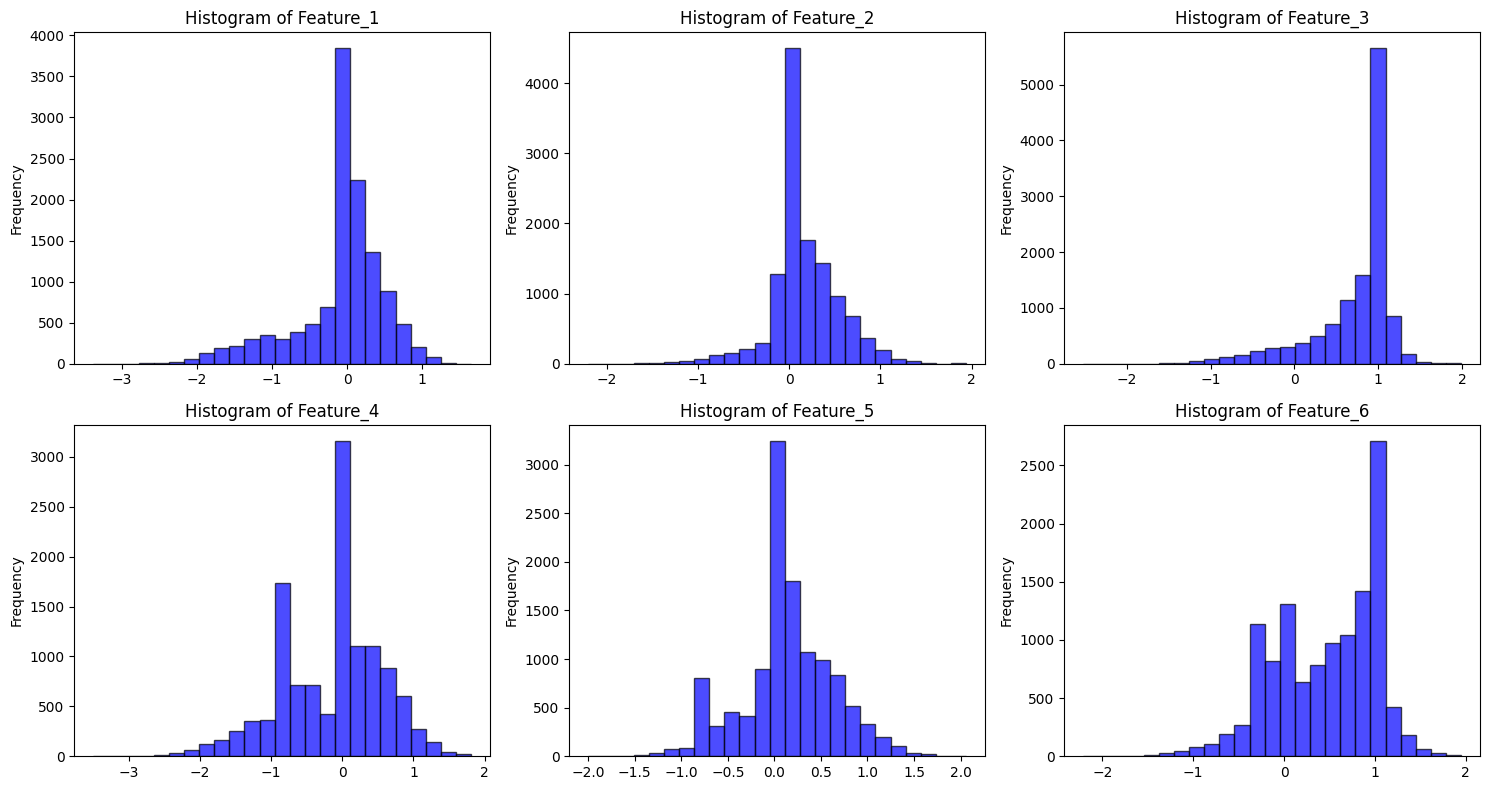

In [14]:
import matplotlib.pyplot as plt

features = ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))  
for i, feature in enumerate(features):
    ax = axes[i // 3, i % 3] 
    Data[feature].plot.hist(bins=25, ax=ax, alpha=0.7, color='blue', edgecolor='black')
    ax.set_title(f"Histogram of {feature}") 

plt.tight_layout() 
plt.show()

Distribution of each label as percentage:
 Activity
0    20.351677
1    20.351677
2    20.351677
3    20.351677
4    18.593292
Name: proportion, dtype: float64


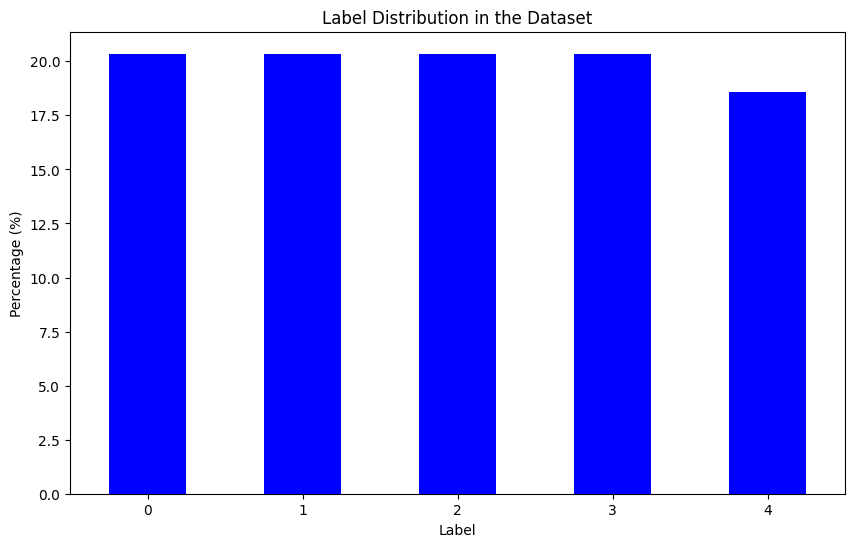

In [15]:
# Calculate the distribution for each category
label_counts = Data['Activity'].value_counts(normalize=True) * 100

# Print the percentage for each category
print("Distribution of each label as percentage:\n", label_counts)

# A graph showing the distribution
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='blue')
plt.title("Label Distribution in the Dataset")
plt.xlabel("Label")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [17]:
x = Data.drop(['Activity'], axis=1)
y = pd.DataFrame(Data['Activity'])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)


In [19]:
rf_classifier = RandomForestClassifier(n_estimators=100,random_state=0)

In [20]:
rf_classifier.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=0)

In [21]:
y_pred = rf_classifier.predict(X_test)

In [22]:
y_pred

array([3, 2, 4, ..., 4, 1, 1])

In [23]:
y_test

,Activity
8413,3
5366,2
12303,4
663,0
2754,1
...,...
4891,1
460,0
11954,4
3505,1


In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9511599511599511


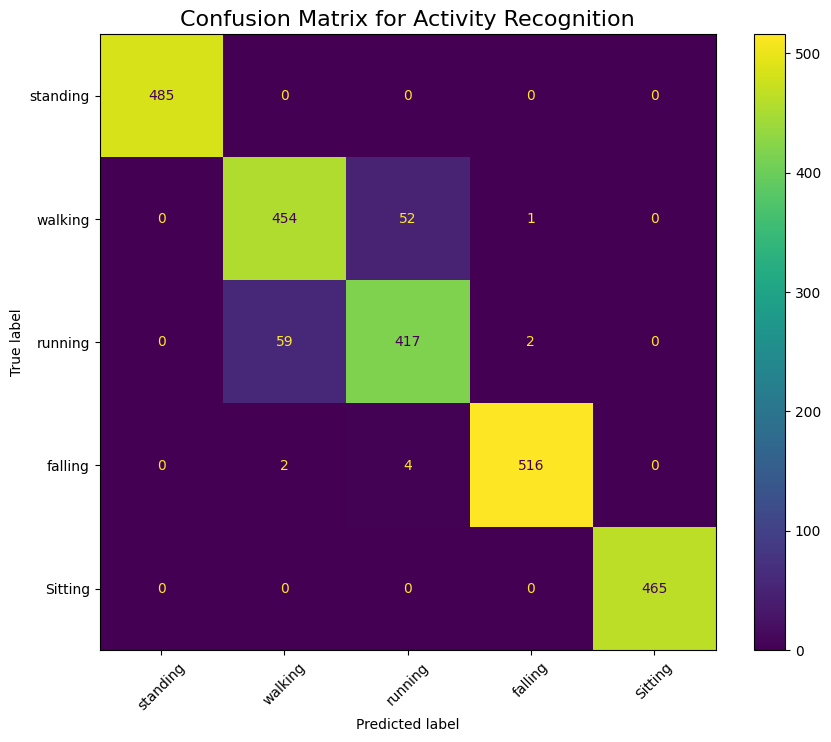

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=["standing", "walking","running", "falling","Sitting"])
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(cmap='viridis', ax=ax, xticks_rotation=45) 

plt.title("Confusion Matrix for Activity Recognition", fontsize=16)
plt.show()

In [26]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       485
           1       0.88      0.90      0.89       507
           2       0.88      0.87      0.88       478
           3       0.99      0.99      0.99       522
           4       1.00      1.00      1.00       465

    accuracy                           0.95      2457
   macro avg       0.95      0.95      0.95      2457
weighted avg       0.95      0.95      0.95      2457



In [27]:
import joblib

# حفظ نموذج مع ضغط bz2
joblib.dump(rf_classifier, "5_activity.joblib", compress=('bz2', 9))
model = joblib.load("5_activity.joblib")